## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
pd.options.mode.chained_assignment = None

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn import metrics

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import f1_score, accuracy_score, recall_score

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

## Importing the dataset

In [2]:
# read the data
df = pd.read_csv('dataset.csv')

## Exploratory data analysis and Data cleaning

In [3]:
df.describe() # describe the dataset to view some properties and check the columns

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,1.162700e+04,11627.000000,11218.000000,11627.000000,11627.000000,11627.000000,11627.000000,11548.000000,11575.000000,11627.000000,...,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000,11627.000000
mean,5.004741e+06,1.568074,241.162418,54.792810,136.324116,83.037757,0.432528,8.250346,25.877349,0.045584,...,0.249333,0.743270,7241.556893,7593.846736,7543.036725,7008.153608,7660.880021,7166.082996,7854.102950,3598.956395
std,2.900877e+06,0.495366,45.368030,9.564299,22.798625,11.660144,0.495448,12.186888,4.102640,0.208589,...,0.432646,0.436848,2477.780010,2136.730285,2192.120311,2641.344513,2011.077091,2541.668477,1788.369623,3464.164659
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,2.474378e+06,1.000000,210.000000,48.000000,120.000000,75.000000,0.000000,0.000000,23.095000,0.000000,...,0.000000,0.000000,6224.000000,7212.000000,7049.500000,5598.500000,7295.000000,6004.000000,7797.500000,0.000000
50%,5.006008e+06,2.000000,238.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.480000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2429.000000
75%,7.472730e+06,2.000000,268.000000,62.000000,149.000000,90.000000,1.000000,20.000000,28.070000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,7329.000000
max,9.999312e+06,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [4]:
df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [5]:
# see the types of variables
df.dtypes

RANDID        int64
SEX           int64
TOTCHOL     float64
AGE           int64
SYSBP       float64
DIABP       float64
CURSMOKE      int64
CIGPDAY     float64
BMI         float64
DIABETES      int64
BPMEDS      float64
HEARTRTE    float64
GLUCOSE     float64
educ        float64
PREVCHD       int64
PREVAP        int64
PREVMI        int64
PREVSTRK      int64
PREVHYP       int64
TIME          int64
PERIOD        int64
HDLC        float64
LDLC        float64
DEATH         int64
ANGINA        int64
HOSPMI        int64
MI_FCHD       int64
ANYCHD        int64
STROKE        int64
CVD           int64
HYPERTEN      int64
TIMEAP        int64
TIMEMI        int64
TIMEMIFC      int64
TIMECHD       int64
TIMESTRK      int64
TIMECVD       int64
TIMEDTH       int64
TIMEHYP       int64
dtype: object

In [6]:
# view the initial shape of our dataset
df.shape

(11627, 39)

In [7]:
#drop irrelevant columns
cols_to_drop=['RANDID','educ','TIMECVD','TIME','PERIOD','HDLC','LDLC','ANGINA','HOSPMI', 'MI_FCHD', 'ANYCHD','STROKE','HYPERTEN', 'DEATH','TIMEAP','TIMEMI', 'TIMEMIFC','TIMECHD', 'TIMESTRK', 'TIMEHYP','TIMEDTH']
df=df.drop(cols_to_drop, axis=1) #axis=1 because we are dropping columns, not rows

In [8]:
# view the shape again
df.shape

(11627, 18)

<AxesSubplot:>

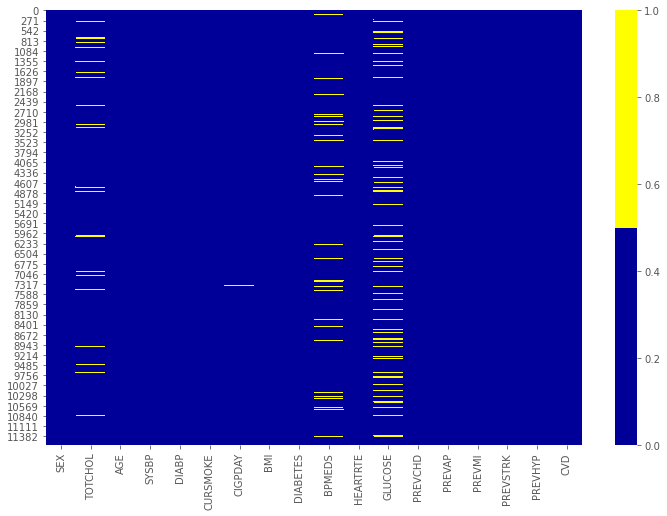

In [9]:
# check for missing values and plot a heatmap
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [10]:
df.isnull().sum().sum() # print number of rows with missing values

2579

In [11]:
print(df.isnull().sum()) # view number of missing values in each column

SEX            0
TOTCHOL      409
AGE            0
SYSBP          0
DIABP          0
CURSMOKE       0
CIGPDAY       79
BMI           52
DIABETES       0
BPMEDS       593
HEARTRTE       6
GLUCOSE     1440
PREVCHD        0
PREVAP         0
PREVMI         0
PREVSTRK       0
PREVHYP        0
CVD            0
dtype: int64


In [12]:
# not many so we can drop them all
df=df.dropna()# drop the observations that contain missing values
df.isnull().sum().sum() # print number of rows with missing values after dropping the rows

0

In [13]:
# check for duplicate values
df.duplicated().sum()

0

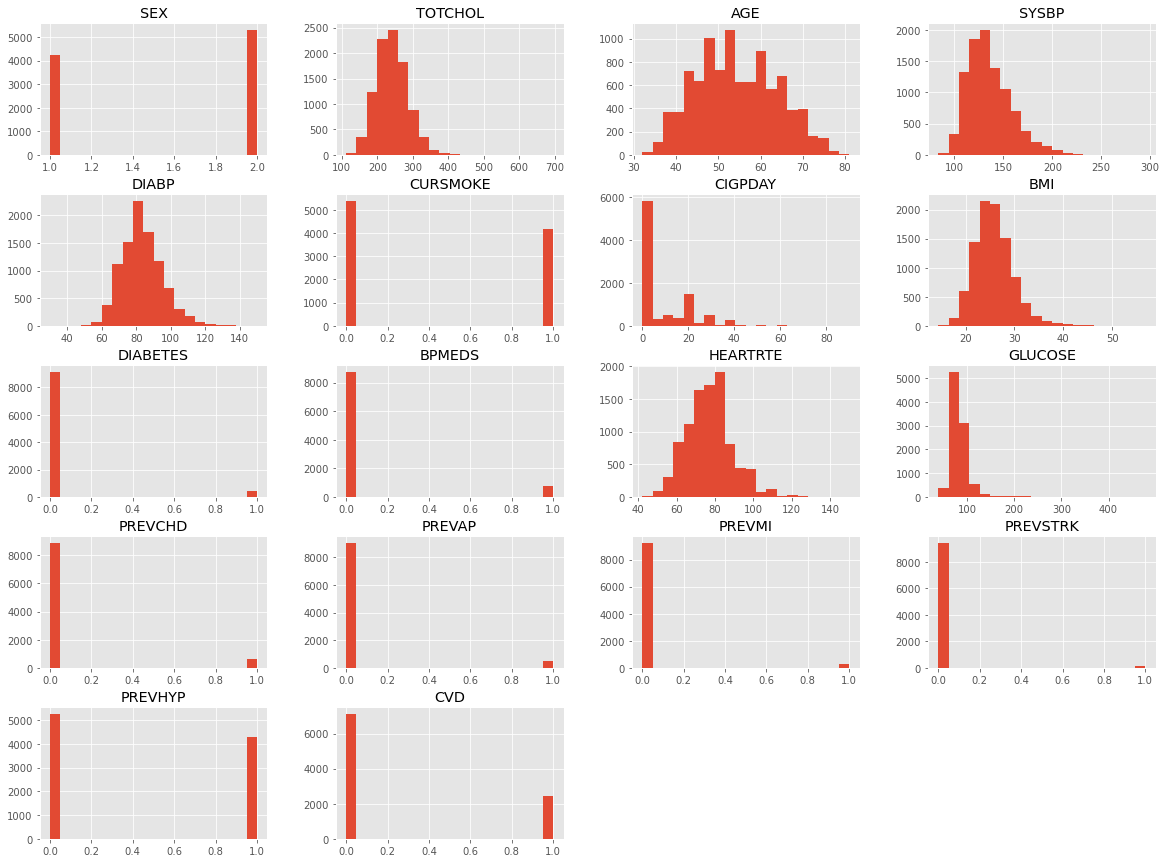

In [14]:
df.hist(bins=20, figsize=(20,15))
plt.show()

In [15]:
# have a better look at the class variable
df.CVD.value_counts()

0    7146
1    2414
Name: CVD, dtype: int64

<AxesSubplot:xlabel='CVD', ylabel='count'>

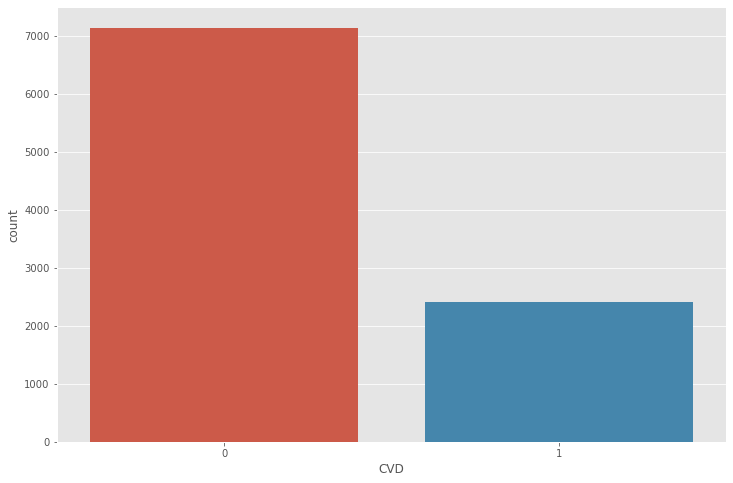

In [16]:
# visualise the class variable
sns.countplot(x='CVD',data=df)

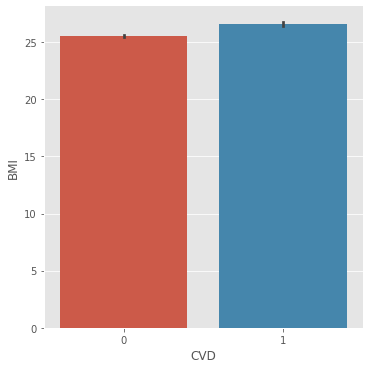

In [17]:
# check BMI of patients with/without heart disease (confidence interval)
sns.catplot(x='CVD',y='BMI',data=df, kind='bar')

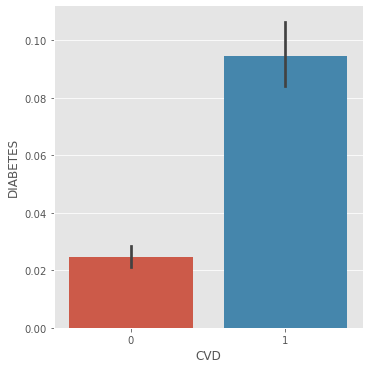

In [18]:
# check diabetes patients with/without heart disease
sns.catplot(x='CVD',y='DIABETES',kind='bar',data=df)

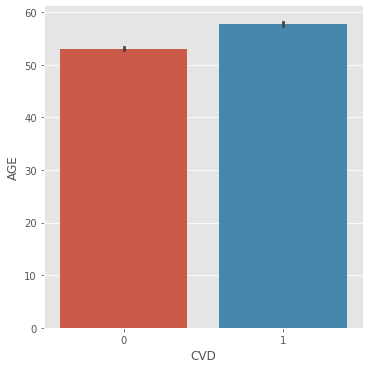

In [19]:
# check diabetes patients with/without heart disease
sns.catplot(x='CVD',y='AGE',kind='bar',data=df)

In [20]:
df.columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVCHD', 'PREVAP',
       'PREVMI', 'PREVSTRK', 'PREVHYP', 'CVD'],
      dtype='object')

In [21]:
df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,CVD
0,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,0,0,0,1
2,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0,0,0,0
3,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,80.0,86.0,0,0,0,0,0,0
4,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,80.0,71.0,0,0,0,0,0,0
5,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0,0,0,0


### Outlier treatment

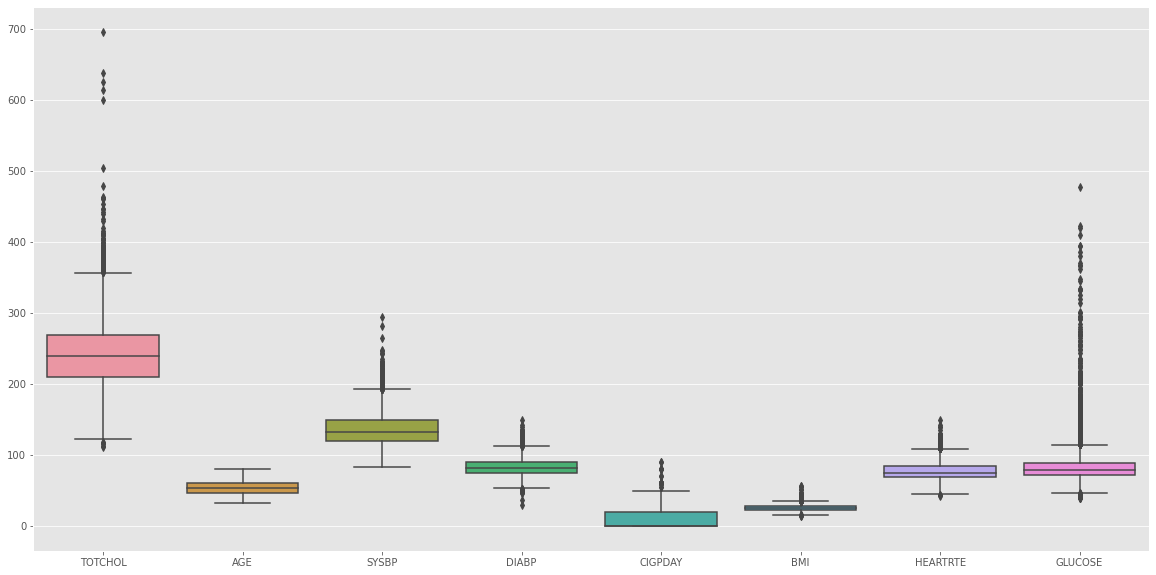

In [22]:
# visualise the outliers of the numerical columns
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']])
plt.show()

In [23]:
dfIQR=df[['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']]
dfIQR.describe()

,TOTCHOL,AGE,SYSBP,DIABP,CIGPDAY,BMI,HEARTRTE,GLUCOSE
count,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000
mean,241.633473,54.299268,135.769979,82.930701,8.400314,25.835465,76.716004,83.756067
std,45.439304,9.474258,22.583883,11.715679,12.240943,4.038125,12.326825,25.032957
min,112.000000,32.000000,83.500000,30.000000,0.000000,14.430000,42.000000,39.000000
25%,210.000000,47.000000,120.000000,75.000000,0.000000,23.100000,69.000000,72.000000
50%,239.000000,54.000000,132.000000,82.000000,0.000000,25.450000,75.000000,79.000000
75%,269.000000,61.000000,149.000000,90.000000,20.000000,28.030000,85.000000,89.000000
max,696.000000,81.000000,295.000000,150.000000,90.000000,56.800000,150.000000,478.000000


In [24]:
df.describe()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,CVD
count,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000,9560.000000
mean,1.555126,241.633473,54.299268,135.769979,82.930701,0.435774,8.400314,25.835465,0.042155,0.082845,76.716004,83.756067,0.068410,0.051151,0.031381,0.012134,0.447594,0.252510
std,0.496978,45.439304,9.474258,22.583883,11.715679,0.495884,12.240943,4.038125,0.200953,0.275662,12.326825,25.032957,0.252461,0.220316,0.174354,0.109489,0.497272,0.434475
min,1.000000,112.000000,32.000000,83.500000,30.000000,0.000000,0.000000,14.430000,0.000000,0.000000,42.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,210.000000,47.000000,120.000000,75.000000,0.000000,0.000000,23.100000,0.000000,0.000000,69.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,239.000000,54.000000,132.000000,82.000000,0.000000,0.000000,25.450000,0.000000,0.000000,75.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,269.000000,61.000000,149.000000,90.000000,1.000000,20.000000,28.030000,0.000000,0.000000,85.000000,89.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,696.000000,81.000000,295.000000,150.000000,1.000000,90.000000,56.800000,1.000000,1.000000,150.000000,478.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
Q1 = dfIQR.quantile(0.25)
Q3 = dfIQR.quantile(0.75)
IQR = Q3-Q1

In [26]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

<ipython-input-26-710251c414c6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-26-710251c414c6>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(8360, 18)

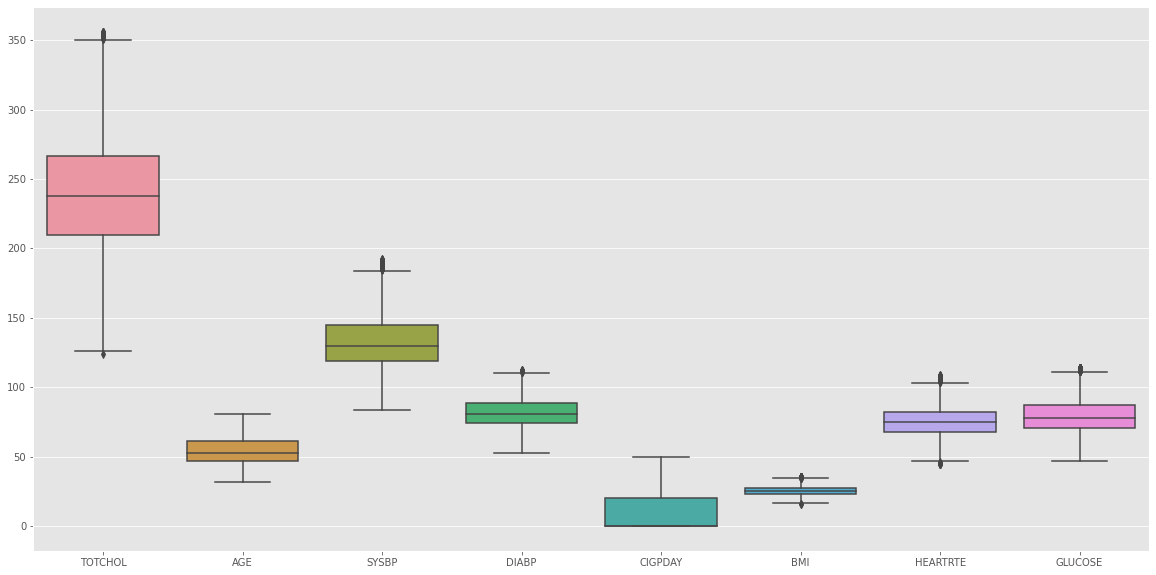

In [27]:
# visualise the outliers of the numerical columns again
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df[['TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE', 'GLUCOSE']])
plt.show()

In [28]:
df.describe()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,CVD
count,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000,8360.000000
mean,1.547847,239.382177,53.877871,132.964414,81.910825,0.443301,8.441507,25.491451,0.018541,0.069378,75.623565,79.596531,0.063038,0.047608,0.029187,0.010287,0.409569,0.229545
std,0.497735,41.399451,9.448219,19.514890,10.493353,0.496805,11.900671,3.461083,0.134904,0.254111,11.202880,11.922930,0.243046,0.212947,0.168339,0.100908,0.491784,0.420566
min,1.000000,124.000000,32.000000,83.500000,53.000000,0.000000,0.000000,15.920000,0.000000,0.000000,45.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,210.000000,47.000000,119.000000,74.500000,0.000000,0.000000,23.060000,0.000000,0.000000,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,238.000000,53.000000,130.000000,81.000000,0.000000,0.000000,25.300000,0.000000,0.000000,75.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,266.250000,61.000000,145.000000,89.000000,1.000000,20.000000,27.750000,0.000000,0.000000,82.000000,87.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,356.000000,81.000000,192.500000,112.500000,1.000000,50.000000,35.420000,1.000000,1.000000,109.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlation of all the variables with respect to each other

<AxesSubplot:>

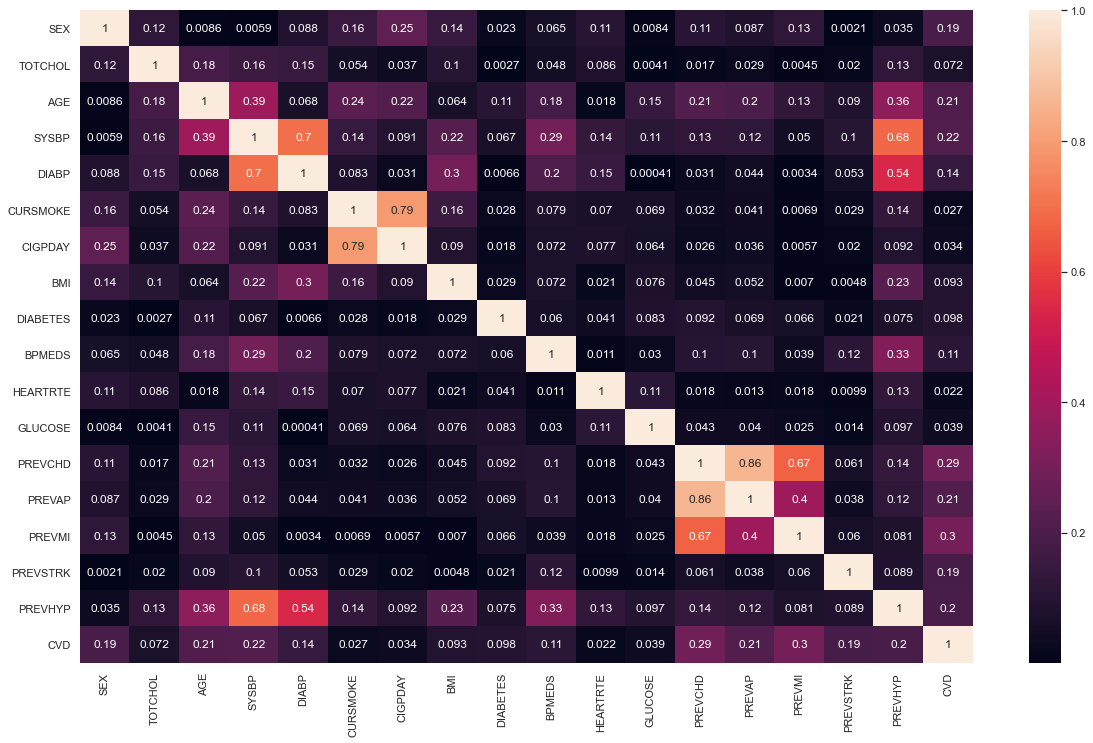

In [29]:
sns.set(rc={'figure.figsize':(20,12)})
sns.heatmap(df.corr().abs(),annot=True)

### Feature Selection

In [30]:
# Identify the features with the most importance for the outcome variable Heart Disease

# separate independent & dependent variables
X = df.iloc[:,0:17]  # independent columns
y = df.iloc[:,-1]    # target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  # print 10 best features

       Specs        Score
3      SYSBP  1106.735102
14    PREVMI   734.158949
12   PREVCHD   660.055570
2        AGE   617.476701
13    PREVAP   362.067542
1    TOTCHOL   310.177298
15  PREVSTRK   288.653465
4      DIABP   223.588197
16   PREVHYP   188.702376
6    CIGPDAY   164.474080
9     BPMEDS    95.286077


In [31]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
3,SYSBP,1106.735102
14,PREVMI,734.158949
12,PREVCHD,660.055570
2,AGE,617.476701
13,PREVAP,362.067542
1,TOTCHOL,310.177298
15,PREVSTRK,288.653465
4,DIABP,223.588197
16,PREVHYP,188.702376
6,CIGPDAY,164.474080


In [32]:
# drop the features we will not use
#drop irrelevant columns
drop_columns=['CURSMOKE', 'BMI', 'HEARTRTE', 'GLUCOSE']
df=df.drop(drop_columns, axis=1) # axis=1 because we are dropping columns, not rows

In [33]:
df.shape

(8360, 14)

In [34]:
df.columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'DIABETES',
       'BPMEDS', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'CVD'],
      dtype='object')

## Splitting the dataset

In [35]:
x = df.iloc[:, :-1] # independent variables
y = df.iloc[:, -1] # dependent variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

## Balance class variable using SMOTE and Random Undersampling

In [36]:
print('\nBalance of positive and negative classes (%):')
y_train.value_counts(normalize=True)*100


Balance of positive and negative classes (%):


0    77.123206
1    22.876794
Name: CVD, dtype: float64

In [37]:
# define pipeline
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [38]:
x_train_res, y_train_res = pipeline.fit_resample(x_train, y_train)

In [39]:
print('\nBalance of positive and negative classes (%):')
y_train_res.value_counts(normalize=True)*100


Balance of positive and negative classes (%):


0    55.54981
1    44.45019
Name: CVD, dtype: float64

## Method for fitting and evaluating algorithms

In [40]:
def run_evaluate(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Classification report : \n\n', classification_report(y_test, y_pred))
    print('Confusion matrix : \n\n',confusion_matrix(y_test,y_pred))
    recall = recall_score(y_test, y_pred)
    print('Recall: ',recall)
    

In [41]:
def training_accuracy(model, x_train, y_train, x_test, y_test):
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    print('Accuracy on training set:', train_acc)
    

## Logistic Regression before resampling

In [42]:
lr = LogisticRegression(solver='newton-cg')
run_evaluate(lr, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1283
           1       0.76      0.22      0.34       389

    accuracy                           0.80      1672
   macro avg       0.78      0.60      0.61      1672
weighted avg       0.80      0.80      0.76      1672

Confusion matrix : 

 [[1257   26]
 [ 305   84]]
Recall:  0.2159383033419023


## Logistic Regression after resampling

In [43]:
run_evaluate(lr, x_train_res, y_train_res, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.86      0.76      0.81      1283
           1       0.43      0.58      0.49       389

    accuracy                           0.72      1672
   macro avg       0.64      0.67      0.65      1672
weighted avg       0.76      0.72      0.73      1672

Confusion matrix : 

 [[981 302]
 [164 225]]
Recall:  0.5784061696658098


## Logistic Regression with cost function (balanced)

In [44]:
lr_balanced = LogisticRegression(solver='newton-cg', class_weight='balanced')
run_evaluate(lr_balanced, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.86      0.71      0.78      1283
           1       0.40      0.63      0.49       389

    accuracy                           0.69      1672
   macro avg       0.63      0.67      0.64      1672
weighted avg       0.76      0.69      0.71      1672

Confusion matrix : 

 [[917 366]
 [144 245]]
Recall:  0.6298200514138818


In [45]:
training_accuracy(lr_balanced, x_train, y_train, x_test, y_test)

Accuracy on training set: 0.7129186602870813


In [46]:
scoring = ['recall_macro']
scores = cross_validate(lr_balanced, x, y, scoring=scoring,cv=10, return_train_score=True)

In [47]:
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_recall_macro', 'train_recall_macro'])

In [48]:
scores['test_recall_macro']

array([0.65008734, 0.71116395, 0.71834563, 0.67054865, 0.70532479,
       0.68554283, 0.7101611 , 0.65982466, 0.69929154, 0.70088072])

In [49]:
scores['train_recall_macro']

array([0.69894323, 0.69272158, 0.69148934, 0.69623262, 0.69106412,
       0.69416259, 0.69078065, 0.69668201, 0.692487  , 0.69058223])

## Logistic Regression with cost function (calculating weights)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/savvia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoring for different class weights')

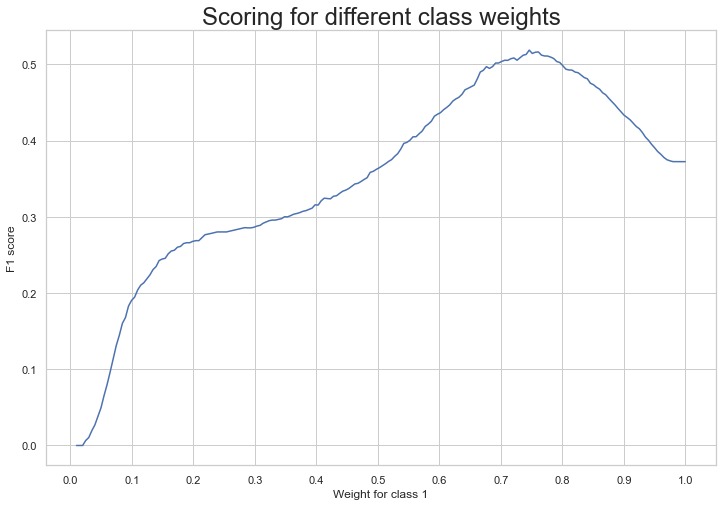

In [50]:
lr = LogisticRegression(solver='newton-cg')
# Setting the range for class weights
weights = np.linspace(0.0,0.99,200)
# Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(x_train, y_train)

# Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [51]:
weigh_data.score.max()

0.5186643530267105

In [52]:
weigh_data.query('score==0.5186643530267105')['weight']

51    0.746281
Name: weight, dtype: float64

In [53]:
weigh_data.loc[[51]]

,score,weight
51,0.518664,0.746281


### The minority class is class 1. The majority class is class 0. Weight for class 1: 0.746281 Weight for class 0: 0.253719

In [54]:
lr_weighted = LogisticRegression(solver='newton-cg', class_weight={0: 0.253719, 1: 0.746281})
run_evaluate(lr_weighted, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.86      0.76      0.81      1283
           1       0.42      0.58      0.49       389

    accuracy                           0.72      1672
   macro avg       0.64      0.67      0.65      1672
weighted avg       0.76      0.72      0.73      1672

Confusion matrix : 

 [[977 306]
 [163 226]]
Recall:  0.5809768637532133


## Decision Tree before resampling

In [55]:
decision_tree= DecisionTreeClassifier(criterion= "gini",random_state=10)
run_evaluate(decision_tree, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1283
           1       0.39      0.38      0.38       389

    accuracy                           0.72      1672
   macro avg       0.60      0.60      0.60      1672
weighted avg       0.71      0.72      0.72      1672

Confusion matrix : 

 [[1049  234]
 [ 241  148]]
Recall:  0.38046272493573263


## Decision Tree after resampling

In [56]:
run_evaluate(decision_tree, x_train_res, y_train_res, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.81      0.69      0.74      1283
           1       0.31      0.46      0.37       389

    accuracy                           0.64      1672
   macro avg       0.56      0.58      0.56      1672
weighted avg       0.69      0.64      0.66      1672

Confusion matrix : 

 [[884 399]
 [209 180]]
Recall:  0.46272493573264784


## Decision Tree with cost function

In [57]:
decision_tree_balanced= DecisionTreeClassifier(criterion= "gini",random_state=10, class_weight='balanced')
run_evaluate(decision_tree_balanced, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1283
           1       0.38      0.34      0.36       389

    accuracy                           0.72      1672
   macro avg       0.59      0.59      0.59      1672
weighted avg       0.71      0.72      0.71      1672

Confusion matrix : 

 [[1067  216]
 [ 255  134]]
Recall:  0.3444730077120823


## KNN (K Nearest Neighbors) with imbalanced data

### Checking for the best value of  k:

In [58]:
def find_best_k(x_train, y_train):
    error = []
    # Calculating error for K values between 1 and 30
    for i in range(1, 30):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

Minimum error:- 0.23026315789473684 at K = 21


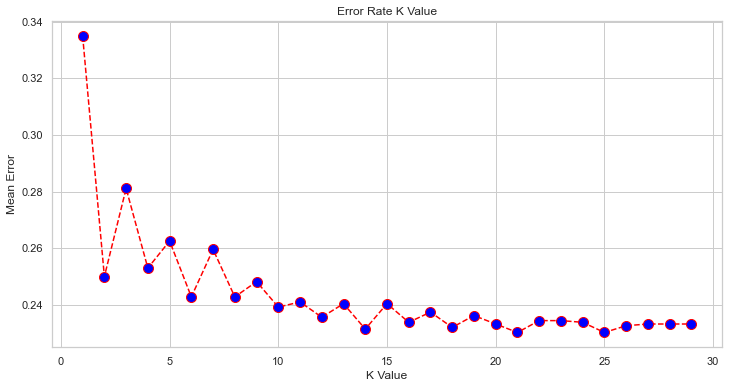

In [59]:
find_best_k(x_train, y_train)

In [60]:
knn= KNeighborsClassifier(n_neighbors=21)  
run_evaluate(knn, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.78      0.98      0.87      1283
           1       0.54      0.07      0.12       389

    accuracy                           0.77      1672
   macro avg       0.66      0.53      0.50      1672
weighted avg       0.72      0.77      0.69      1672

Confusion matrix : 

 [[1260   23]
 [ 362   27]]
Recall:  0.06940874035989718


## KNN (K Nearest Neighbors) after resampling

Minimum error:- 0.30442583732057416 at K = 2


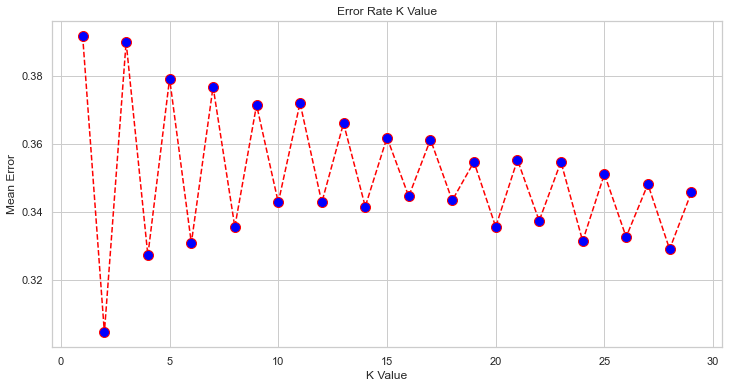

In [61]:
find_best_k(x_train_res, y_train_res)

In [62]:
knn_res= KNeighborsClassifier(n_neighbors=2)  
run_evaluate(knn_res, x_train_res, y_train_res, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1283
           1       0.31      0.26      0.28       389

    accuracy                           0.70      1672
   macro avg       0.55      0.54      0.54      1672
weighted avg       0.68      0.70      0.68      1672

Confusion matrix : 

 [[1063  220]
 [ 289  100]]
Recall:  0.2570694087403599


## Random Forest with GridSearchCV on imbalanced data

In [63]:
rfc=RandomForestClassifier(random_state=42)

In [64]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [65]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [66]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [67]:
rfc0=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='gini')
run_evaluate(rfc0, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.80      0.99      0.89      1283
           1       0.89      0.18      0.30       389

    accuracy                           0.80      1672
   macro avg       0.84      0.59      0.59      1672
weighted avg       0.82      0.80      0.75      1672

Confusion matrix : 

 [[1274    9]
 [ 318   71]]
Recall:  0.18251928020565553


## Random Forest with GridSearchCV on oversampled data

In [68]:
CV_rfc.fit(x_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [69]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [70]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
run_evaluate(rfc1, x_train_res, y_train_res, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.86      0.78      0.82      1283
           1       0.44      0.56      0.49       389

    accuracy                           0.73      1672
   macro avg       0.65      0.67      0.66      1672
weighted avg       0.76      0.73      0.74      1672

Confusion matrix : 

 [[1006  277]
 [ 170  219]]
Recall:  0.5629820051413882


## Random Forest with Bootstrap Class Weighting

In [71]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='gini',class_weight='balanced_subsample')
run_evaluate(rfc2, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.86      0.74      0.80      1283
           1       0.41      0.61      0.50       389

    accuracy                           0.71      1672
   macro avg       0.64      0.68      0.65      1672
weighted avg       0.76      0.71      0.73      1672

Confusion matrix : 

 [[946 337]
 [150 239]]
Recall:  0.6143958868894601


In [72]:
training_accuracy(rfc2, x_train, y_train, x_test, y_test)

Accuracy on training set: 0.7271232057416268


## Cross validation on random forest

In [73]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc2, x, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.69138756 0.73205742 0.71291866 0.73205742 0.71889952 0.70215311
 0.71650718 0.66746411 0.70095694 0.71650718]
cv_scores mean:0.7090909090909091


In [74]:
# Save the model as serialized object pickle
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rfc2, file)

In [75]:
df.columns

Index(['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'DIABETES',
       'BPMEDS', 'PREVCHD', 'PREVAP', 'PREVMI', 'PREVSTRK', 'PREVHYP', 'CVD'],
      dtype='object')

In [76]:
df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CIGPDAY,DIABETES,BPMEDS,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,CVD
0,1,195.0,39,106.0,70.0,0.0,0,0.0,0,0,0,0,0,1
2,2,250.0,46,121.0,81.0,0.0,0,0.0,0,0,0,0,0,0
3,2,260.0,52,105.0,69.5,0.0,0,0.0,0,0,0,0,0,0
4,2,237.0,58,108.0,66.0,0.0,0,0.0,0,0,0,0,0,0
5,1,245.0,48,127.5,80.0,20.0,0,0.0,0,0,0,0,0,0


## XGBoost on imbalanced data

In [77]:
xgb = XGBClassifier()
run_evaluate(xgb, x_train, y_train, x_test, y_test)

[00:28:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report : 

               precision    recall  f1-score   support

           0       0.80      0.93      0.86      1283
           1       0.54      0.25      0.34       389

    accuracy                           0.78      1672
   macro avg       0.67      0.59      0.60      1672
weighted avg       0.74      0.78      0.74      1672

Confusion matrix : 

 [[1199   84]
 [ 292   97]]
Recall:  0.2493573264781491


## XGBoost on oversampled data

In [78]:
run_evaluate(xgb, x_train_res, y_train_res, x_test, y_test)

[00:28:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification report : 

               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1283
           1       0.40      0.46      0.43       389

    accuracy                           0.72      1672
   macro avg       0.62      0.63      0.62      1672
weighted avg       0.73      0.72      0.72      1672

Confusion matrix : 

 [[1022  261]
 [ 212  177]]
Recall:  0.455012853470437


## ADA Boost (Adaptive Boost) on imbalanced data

In [79]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
run_evaluate(abc, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.81      0.98      0.88      1283
           1       0.74      0.22      0.34       389

    accuracy                           0.80      1672
   macro avg       0.77      0.60      0.61      1672
weighted avg       0.79      0.80      0.76      1672

Confusion matrix : 

 [[1252   31]
 [ 302   87]]
Recall:  0.2236503856041131


## ADA Boost (Adaptive Boost) on resampled data

In [80]:
run_evaluate(abc, x_train_res, y_train_res, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.85      0.80      0.82      1283
           1       0.45      0.54      0.49       389

    accuracy                           0.74      1672
   macro avg       0.65      0.67      0.66      1672
weighted avg       0.76      0.74      0.75      1672

Confusion matrix : 

 [[1024  259]
 [ 180  209]]
Recall:  0.5372750642673522


## Support Vector Machine (SVM) on imbalanced data

In [81]:
sv = svm.SVC(kernel='linear')
run_evaluate(sv, x_train, y_train, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1283
           1       0.75      0.17      0.28       389

    accuracy                           0.79      1672
   macro avg       0.77      0.58      0.58      1672
weighted avg       0.79      0.79      0.74      1672

Confusion matrix : 

 [[1260   23]
 [ 321   68]]
Recall:  0.17480719794344474


## Support Vector Machine (SVM) on resampled data

In [82]:
run_evaluate(sv, x_train_res, y_train_res, x_test, y_test)

Classification report : 

               precision    recall  f1-score   support

           0       0.86      0.72      0.79      1283
           1       0.40      0.62      0.49       389

    accuracy                           0.70      1672
   macro avg       0.63      0.67      0.64      1672
weighted avg       0.76      0.70      0.72      1672

Confusion matrix : 

 [[925 358]
 [148 241]]
Recall:  0.6195372750642674


## k-fold Cross Validation

In [83]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import cross_val_score

In [84]:
model = DecisionTreeClassifier()
kfold_validation = KFold(10)

results = cross_val_score(model, x, y, cv = kfold_validation)
print(results)
print(np.mean(results)*100)

[0.72368421 0.70334928 0.715311   0.715311   0.70215311 0.69856459
 0.73325359 0.70574163 0.72607656 0.72727273]
71.50717703349284


## ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical